In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
pd.options.display.max_columns = 200
plt.style.use('resources/other/clean.mplstyle')

GeoPackage from [Urban Centre Database UCDB R2019A](https://ghsl.jrc.ec.europa.eu/ghs_stat_ucdb2015mt_r2019a.php).

In [3]:
gdf = gpd.read_file('resources/GHS_STAT_UCDB2015MT_GLOBE_R2019A/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.gpkg')

In [11]:
gdf.sample(5)

,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,CTR_MN_ISO,XBRDR,XCTR_NBR,XC_NM_LST,XC_ISO_LST,GRGN_L1,GRGN_L2,UC_NM_MN,UC_NM_LST,UC_NM_SRC,H75_NBR,H90_NBR,H00_NBR,H75_AREA,H90_AREA,H00_AREA,E_BM_NM_LST,E_SL_LST,EL_AV_ALS,E_KG_NM_LST,E_RB_NM_LST,E_WR_P_90,E_WR_P_00,E_WR_P_14,E_WR_T_90,E_WR_T_00,E_WR_T_14,B75,B90,B00,B15,P75,P90,P00,P15,BUCAP75,BUCAP90,BUCAP00,BUCAP15,NTL_AV,GDP90_SM,GDP00_SM,GDP15_SM,INCM_CMI,DEV_CMI,TT2CC,E_GR_AV90,E_GR_AV00,E_GR_AV14,E_GR_AH90,E_GR_AM90,E_GR_AL90,E_GR_AT90,E_GR_AH00,E_GR_AM00,E_GR_AL00,E_GR_AT00,E_GR_AH14,E_GR_AM14,E_GR_AL14,E_GR_AT14,E_EC2E_E75,E_EC2E_E90,E_EC2E_E00,E_EC2E_E15,E_EC2E_R75,E_EC2E_R90,E_EC2E_R00,E_EC2E_R15,E_EC2E_I75,E_EC2E_I90,E_EC2E_I00,E_EC2E_I15,E_EC2E_T75,E_EC2E_T90,E_EC2E_T00,E_EC2E_T15,E_EC2E_A75,E_EC2E_A90,E_EC2E_A00,E_EC2E_A15,E_EC2O_E75,E_EC2O_E90,E_EC2O_E00,E_EC2O_E15,E_EC2O_R75,E_EC2O_R90,E_EC2O_R00,E_EC2O_R15,E_EC2O_I75,E_EC2O_I90,E_EC2O_I00,E_EC2O_I15,E_EC2O_T75,E_EC2O_T90,E_EC2O_T00,E_EC2O_T15,E_EC2O_A75,E_EC2O_A90,E_EC2O_A00,E_EC2O_A15,E_EPM2_E75,E_EPM2_E90,E_EPM2_E00,E_EPM2_E15,E_EPM2_R75,E_EPM2_R90,E_EPM2_R00,E_EPM2_R15,E_EPM2_I75,E_EPM2_I90,E_EPM2_I00,E_EPM2_I15,E_EPM2_T75,E_EPM2_T90,E_EPM2_T00,E_EPM2_T15,E_EPM2_A75,E_EPM2_A90,E_EPM2_A00,E_EPM2_A15,E_CPM2_T00,E_CPM2_T05,E_CPM2_T10,E_CPM2_T14,EX_FD_AREA,EX_FD_B75,EX_FD_B90,EX_FD_B00,EX_FD_B15,EX_FD_P75,EX_FD_P90,EX_FD_P00,EX_FD_P15,EX_SS_AREA,EX_SS_B75,EX_SS_B90,EX_SS_B00,EX_SS_B15,EX_SS_P75,EX_SS_P90,EX_SS_P00,EX_SS_P15,EX_EQ19PGA,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,geometry
6040,6041.0,2.0,1.0,33.892873,66.062998,33.901554,66.078388,33.897213,66.070693,Afghanistan,AFG,0.0,1.0,Afghanistan,AFG,Asia,South-Central Asia,N/A,-,N/A,0.0,0.0,0.0,0.0,0.0,0.0,Deserts and Xeric Shrublands,Leptosols,2535.775521,"Snow with dry summer, and Warm summer",NAN,377.950005,232.775009,416.250008,9.044398,9.474779,9.275399,0.003080,0.003080,0.003080,0.003080,18998.724609,20856.593750,35209.125000,57578.699219,0.162116,0.147675,0.087477,0.053492,0.000000,0.0,0.0,0.000000e+00,LIC,LDCL,596.999488,NaN,NaN,NaN,0.000000,0.000000,1.019478,1.019478,0.000000,0.425324,0.594154,1.019478,0.000000,1.019478,0.0,1.019478,1.594200,4.439454e+00,3.743695e+00,NaN,8.667772,16.691173,3.451321,11.809335,6.876919,4.186625,4.163310,12.719382,0.049478,0.073519,0.101025,0.150730,0.022399,0.040466,0.004609,0.059915,NaN,NaN,NaN,NaN,1.415902,1.143156,4.695159,7.447576,NaN,0.184349,0.480477,1.086141,NaN,NaN,NaN,NaN,5.535165,3.469771,2.958512,6.894156,0.000167,0.000465,0.000142,NaN,0.005744,0.005096,0.017621,0.027774,0.004058,0.005641,0.011583,0.019494,0.000003,0.000005,0.000007,0.000010,0.021125,0.013356,0.011134,0.025677,26.61666,23.561660,30.323340,28.78330,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089108,4.0,available,5.50189,0,0.000000,NaN,"MULTIPOLYGON (((66.06719 33.90155, 66.07839 33..."
1133,1134.0,1.0,17.0,-23.689964,-52.646130,-23.639784,-52.587195,-23.666595,-52.616046,Brazil,BRA,0.0,1.0,Brazil,BRA,Latin America and the Caribbean,South America,Cianorte,Cianorte,GISCO OSM,0.0,0.0,0.0,0.0,0.0,0.0,Tropical and Subtropical Moist Broadleaf Forests,Lixisols,525.630219,"Mild temperate, fully humid, and Hot summer",Parana,1549.050018,1415.550018,1743.800049,19.954486,20.920444,21.102205,2.359100,3.244091,5.260369,5.776612,20884.607296,34317.325104,45297.493622,59089.863648,112.958785,94.532165,116.129368,97.759784,42.702028,157617984.0,176135264.0,3.557475e+07,UMIC,LDC,745.609886,0.446407,0.459912,0.443516,13.633041,3.303816,0.000000,16.936856,14.544775,2.392081,0.000000,16.936856,9.918148,7.018708,0.0,16.936856,NaN,NaN,NaN,NaN,332.040590,689.518903,824.642715,845.816021,890.316366,1160.974011,1949.706445,2992.779739,1041.182490,1482.296462,2287.348280,3647.605247,133.464040,185.034928,465.040448,346.212613,NaN,NaN,NaN,NaN,3127.321947,896.285778,639.231611,537.044305,797.833183,2218.668141,2780.951561,6116.452778,

In [4]:
bol = gdf[gdf.XC_ISO_LST == 'BOL']

In [59]:
def plotCity(name):
    f, ax = plt.subplots(1,1,figsize=(8,8), dpi=100)
    city = gdf[gdf.UC_NM_MN == name].copy()
    city_hull = city.to_crs('32719').convex_hull.buffer(5e3).to_crs(gdf.crs)
    city.boundary.plot(ax=ax, color='red')
    city_hull.boundary.plot(ax=ax, color='red', alpha=.2)
    ax.set_axis_off()
    cx.add_basemap(
        ax=ax,
        attribution='',
        crs=gdf.crs,
        source=cx.providers.CartoDB.Positron
    )

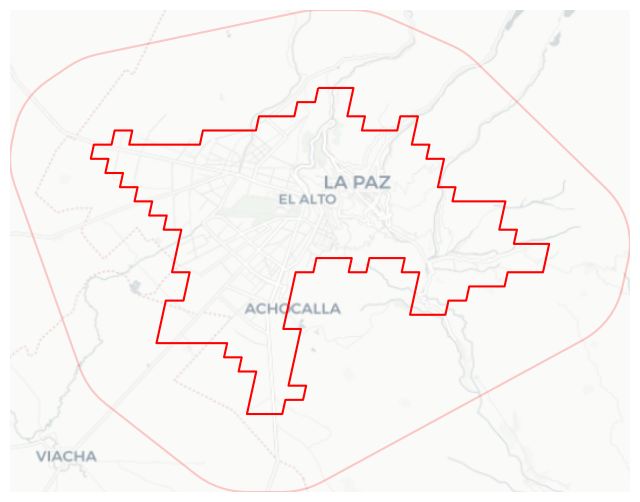

In [60]:
plotCity('El Alto [La Paz]')

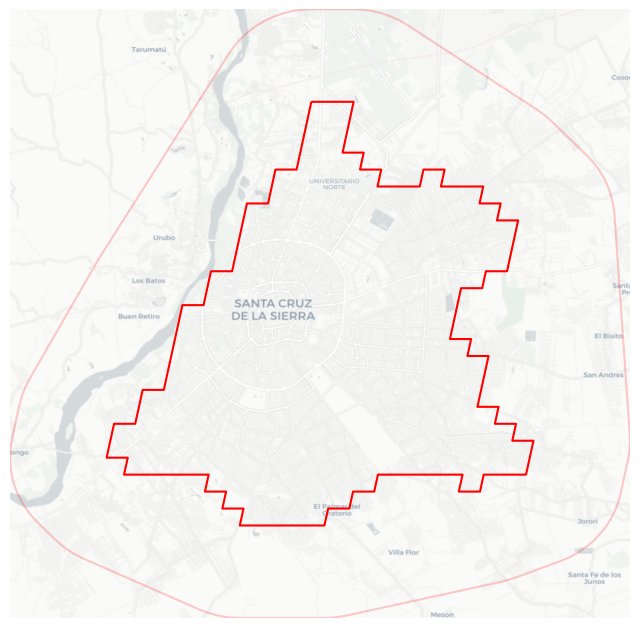

In [45]:
plotCity('Santa Cruz de la Sierra')

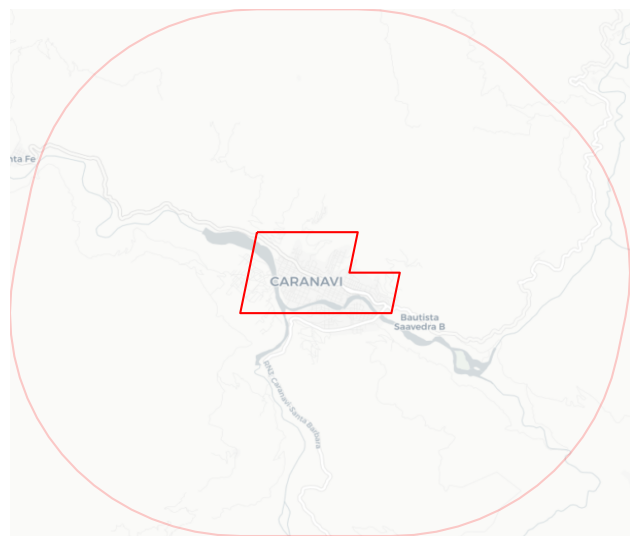

In [46]:
plotCity('Caranavi')

In [6]:
bol = bol.rename(columns={'UC_NM_LST': 'name'})
bol[['name', 'geometry']].to_file('resources/ghs_ucdb_extract/bolivia.geojson')